# An explanation of ML process Data Analysis with supervised learning

## Para aplicar un modelo de Machine Learning se deben llevar a cabo los siguientes pasos

1. Elija una clase de modelo importando la clase de estimador apropiada (ya sea para clasificar o predecir).
2. Elija los hiperparámetros del modelo instanciando esta clase con los valores deseados.
3. Organice los datos en una matriz de características (X) y un vector objetivo siguiendo la discusión anterior (Y).
4. Ajuste el modelo a sus datos llamando al método fit() de la instancia del modelo al training data set.
5. Validar el modelo mediante las curvas de entrenamiento y la validación (tunning)
6. Aplicar el Modelo a nuevos datos (O las posibilidades para el caso de la clasificación).

## Ejemplo 1 

### Supervised learning example: Simple linear regression



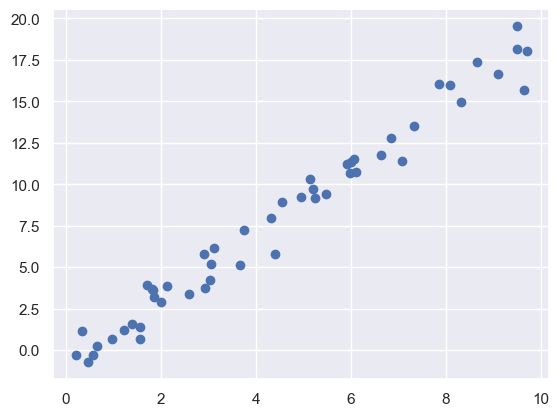

In [19]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [20]:
# 1. Elija una clase de modelo importando la clase de estimador apropiada  ---> una regresión lineal

from sklearn.linear_model import LinearRegression

In [21]:
# 2. Elija los hiperparámetros del modelo instanciando esta clase con los valores deseados.  ----> en este cas una regresión por OLS solo con el intercepto. 

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [27]:
# 3. Organice los datos en una matriz de características (X) y un vector objetivo siguiendo la discusión anterior (Y).

X = x[:, np.newaxis]
X.shape
#X
# X

(50, 1)

In [26]:
#y


In [28]:
# 4. Ajuste el modelo a sus datos llamando al método fit() de la instancia del modelo al training data set. ----> aun no hemos visto como partir datos en training y validation

model.fit(X, y)

LinearRegression()

In [ ]:
# model.coef_
# model.intercept_

In [ ]:
# 5 lo veremos luego, en la etapa del Tuning

In [ ]:
# 6.  Aplicar el Modelo a nuevos datos (predecir por valores o probabilidades)
# en este caso veremos con el predict()

In [33]:
xfit = np.linspace(-1, 11)
xfit
# Xfit = xfit[:, np.newaxis]   ----> lo hacemos un vector
# Xfit

array([[-1.        ],
       [-0.75510204],
       [-0.51020408],
       [-0.26530612],
       [-0.02040816],
       [ 0.2244898 ],
       [ 0.46938776],
       [ 0.71428571],
       [ 0.95918367],
       [ 1.20408163],
       [ 1.44897959],
       [ 1.69387755],
       [ 1.93877551],
       [ 2.18367347],
       [ 2.42857143],
       [ 2.67346939],
       [ 2.91836735],
       [ 3.16326531],
       [ 3.40816327],
       [ 3.65306122],
       [ 3.89795918],
       [ 4.14285714],
       [ 4.3877551 ],
       [ 4.63265306],
       [ 4.87755102],
       [ 5.12244898],
       [ 5.36734694],
       [ 5.6122449 ],
       [ 5.85714286],
       [ 6.10204082],
       [ 6.34693878],
       [ 6.59183673],
       [ 6.83673469],
       [ 7.08163265],
       [ 7.32653061],
       [ 7.57142857],
       [ 7.81632653],
       [ 8.06122449],
       [ 8.30612245],
       [ 8.55102041],
       [ 8.79591837],
       [ 9.04081633],
       [ 9.28571429],
       [ 9.53061224],
       [ 9.7755102 ],
       [10

In [35]:
# Predecimos estos nuevos valores, seria como la obtención por los valores ajustados o los y sombreros
yfit = model.predict(Xfit)
yfit

array([-2.88096733, -2.39664326, -1.9123192 , -1.42799513, -0.94367106,
       -0.459347  ,  0.02497707,  0.50930113,  0.9936252 ,  1.47794926,
        1.96227333,  2.44659739,  2.93092146,  3.41524552,  3.89956959,
        4.38389366,  4.86821772,  5.35254179,  5.83686585,  6.32118992,
        6.80551398,  7.28983805,  7.77416211,  8.25848618,  8.74281024,
        9.22713431,  9.71145837, 10.19578244, 10.68010651, 11.16443057,
       11.64875464, 12.1330787 , 12.61740277, 13.10172683, 13.5860509 ,
       14.07037496, 14.55469903, 15.03902309, 15.52334716, 16.00767122,
       16.49199529, 16.97631936, 17.46064342, 17.94496749, 18.42929155,
       18.91361562, 19.39793968, 19.88226375, 20.36658781, 20.85091188])

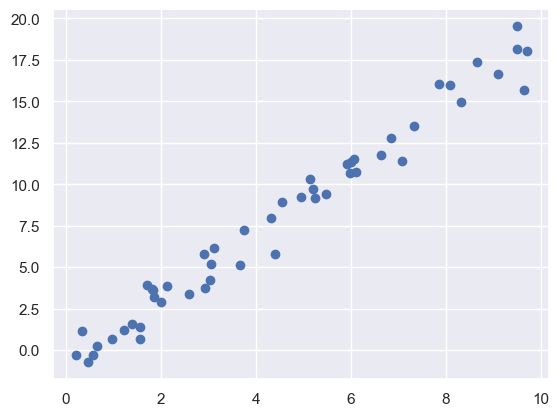

In [37]:
# Veamos el resultado de las 4 nuevas, con sus valores ajustados

plt.scatter(x, y)


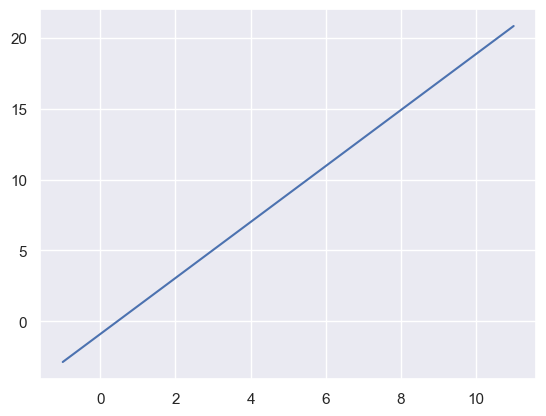

In [38]:
plt.plot(xfit, yfit);

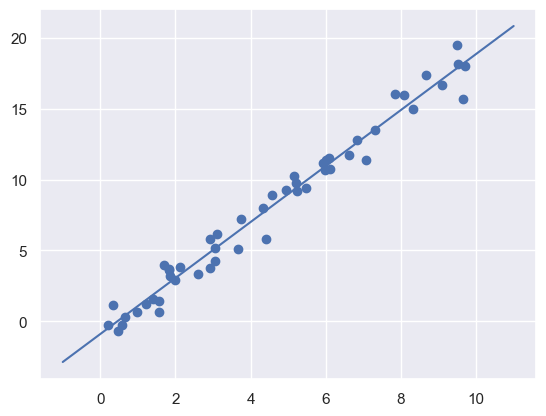

In [39]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Este caso fue aún parece un modelo de regresión estadístico.

Se necesitan dos componentes para hacerlo un model ode ML

1. Hacer la partición de los datos en Training y validation
2. Hacer el proceso de aumentar los parámetros (tunning de los hyper parámetros)

## Ejemplo 2

### Orden de polinomios en la regresión lineal.

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [2]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

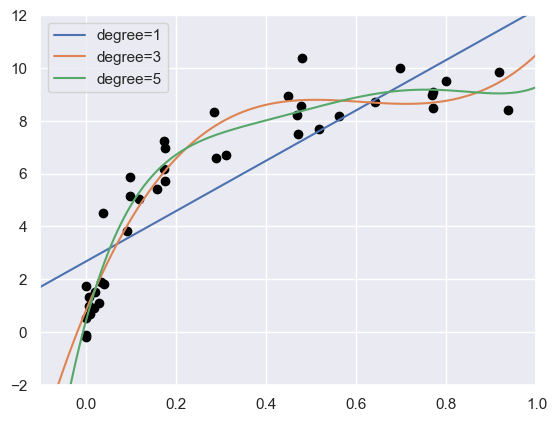

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [6]:
from sklearn.model_selection import learning_curve  
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

TypeError: validation_curve() takes 3 positional arguments but 5 positional arguments (and 1 keyword-only argument) were given

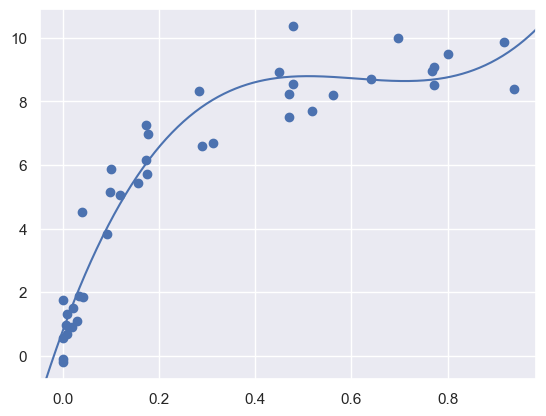

In [7]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);